In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
%matplotlib inline

# Задание
Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами.

# Реализация
Создадим датасет, описывающий параметры финансовой деятельности организаций. Он будет содержать в качестве признаков некоторые данные об организации или финансовые показатели, в качестве целевой переменной будет Рентабельность активов.

In [ ]:
# количество примеров
n_samples = 666

# существующие налоговые ставки
stavka = [20, 6, 30, 13, 15, 10]

Создаем признаки и целевую переменную случайным выбором значения из заданного пространства

In [ ]:
# количество лет жизни организации
Surviving = np.random.choice(21, n_samples) + 1

# нераспределенная прибыль
Un_profit = np.random.choice(200, n_samples) + 6

# чистая прибыль - за вычетом налога
# случайно определяется к какому типу налогообложения принадлежит организации и её ставка
# плюс вводится небольшая погрешность до 10 - на возврат налогов, чтобы
# корреляция  между Чистой прибылью и Нераспределенной не была 100%
Net_profit = Un_profit * (1 - np.random.choice(stavka, n_samples) / 100) + np.random.choice(10)

# величина активов
Assets = np.random.choice(1000, n_samples) + 160

# наша целевая переменная - рентабельность активов, отношение Чистой прибыли к величине Активов
ROA = Net_profit / Assets * 100

По расcчитанным данным создадим датасет и выведем:

In [ ]:
data = pd.DataFrame({'Surviving': Surviving, 'Un_profit': Un_profit, 
                     'Net_profit': Net_profit, 'Assets': Assets, 'ROA': ROA})
data.head(5)

,Surviving,Un_profit,Net_profit,Assets,ROA
0,5,108,103.20,509,20.275049
1,17,173,144.40,239,60.418410
2,11,96,87.60,1135,7.718062
3,20,135,120.75,362,33.356354
4,15,131,97.70,1155,8.458874


Предположим, что мы не знаем об искусственности датасета и о взаимосвязях между признаками.
Построим линейную регрессию и проанализируем:

In [ ]:
from sklearn.metrics import mean_absolute_error

X = data[['Surviving', 'Un_profit', 'Net_profit', 'Assets']]
y = data['ROA']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Score: {}'.format(reg.score(X,y)))

Weights: [ 0.03201242 -0.03664233  0.24328816 -0.03559973]
Bias: 23.24221591447786
Error: 6.106949231055115
Score: 0.7543494698970421


Особенные выводы пока не намечаются.
Построим матрицу корреляций между признаками

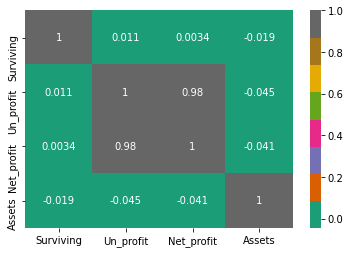

In [ ]:
sns.heatmap(X.corr(), cmap='Dark2',annot = True)

можно заметить очень высокую корреляцию между признаками Un_profit и Net_profit, то есть это фактически одно и то же, значит один из признаков нужно убрать. Воспользуемся рассчитанными выше значениями Weights, которые показывают что значимость для модели признака Un_profit сильно меньше, его и исключим.

In [ ]:
X = data[['Surviving', 'Net_profit','Assets']]
y = data['ROA']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 0.02901174  0.20086137 -0.0355706 ]
Bias: 23.41955437063506
Error: 6.1149660282939555


А давайте построим графики зависимости целевой переменной ROA от признаков:

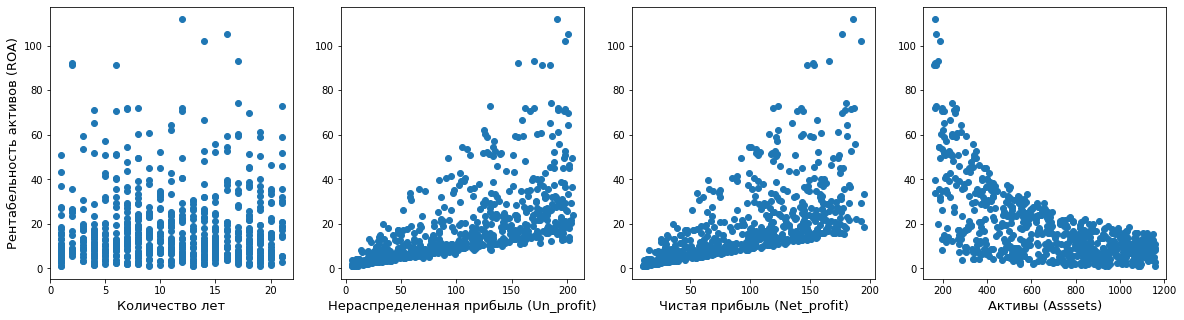

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.scatter(data.Surviving,data.ROA)
plt.xlabel('Количество лет', fontsize=13)
plt.ylabel('Рентабельность активов (ROA)', fontsize=13)
plt.subplot(1,4,2)
plt.scatter(data.Un_profit,data.ROA)
plt.xlabel('Нераспределенная прибыль (Un_profit)', fontsize=13)
plt.subplot(1,4,3)
plt.scatter(data.Net_profit,data.ROA)
plt.xlabel('Чистая прибыль (Net_profit)', fontsize=13)
plt.subplot(1,4,4)
plt.scatter(data.Assets,data.ROA)
plt.xlabel('Активы (Asssets)', fontsize=13)
plt.show()

Какие выводы можно сделать?
- что количество лет распределено равномерно и этот признак скорее всего можно исключить
- что значения прибыли имеют линейную положительную зависимость
- значения активов - нелинейную обратную зависимость

Ну что ж - тогда добавим новые признаки - нелинейную комбинацию Чистой прибыли и Активов, а именно:
- (mult) произведение Чистой прибыли на Активы, хотя это противоречит выводам, сделанным по графическому представлению
- (devide) отношение Чистой прибыли к Активам

In [ ]:
data['mult'] = data['Net_profit'] * data['Assets']
data['divide'] = data['Net_profit'] / data['Assets']

- с параметром Surviving - срок жизни организации пока делать ничего не будем

In [ ]:
X = data[['Surviving', 'divide', 'mult']]
y = data['ROA']
reg = LinearRegression().fit(X, y)

np.set_printoptions(precision=5)
print(f'Weights: {reg.coef_}')
print(f'Bias: {reg.intercept_:.5f}')

pred_values = reg.predict(X)
print(f'Error: {mean_absolute_error(pred_values, y):.5f}')

Weights: [4.04845e-12 1.00000e+02 0.00000e+00]
Bias: -0.00000
Error: 0.00000


# Выводы
Как показал расчет, переменная Surviving действительно незначима, как и произведение Net_profit и Assets, а вся зависимость целиком объясняется переменной divide = Net_profit/Assets, по каковой формуле, собственно и строилась целевая переменная искусственно.